In [51]:
import pandas as pd
import numpy as np
import glob
import os

In [59]:
PROBLEM = 'F7'
RESULTS_DIRS = ['results_single', 'results_dist', 'results_proposed']

In [60]:
dfs = []
for dir_name in RESULTS_DIRS:
    pattern = os.path.join(dir_name, f'{PROBLEM}_*.csv')
    files = sorted(glob.glob(pattern))
    for file in files:
        print(f"Loading {file}")
        dfs.append(pd.read_csv(file, names=["time", "objective"]))
print(f"Loaded {len(dfs)} files for {PROBLEM}")

Loading results_single/F7_1.csv
Loading results_single/F7_2.csv
Loading results_single/F7_3.csv
Loading results_single/F7_4.csv
Loading results_dist/F7_run1.csv
Loading results_dist/F7_run2.csv
Loading results_dist/F7_run3.csv
Loading results_dist/F7_run4.csv
Loading results_dist/F7_run5.csv
Loading results_dist/F7_run6.csv
Loading results_proposed/F7_run1.csv
Loading results_proposed/F7_run10.csv
Loading results_proposed/F7_run2.csv
Loading results_proposed/F7_run3.csv
Loading results_proposed/F7_run4.csv
Loading results_proposed/F7_run5.csv
Loading results_proposed/F7_run6.csv
Loading results_proposed/F7_run7.csv
Loading results_proposed/F7_run8.csv
Loading results_proposed/F7_run9.csv
Loaded 20 files for F7


In [61]:
# Separate single, dist, and proposed files based on directory
dfs_single = []
dfs_dist = []
dfs_proposed = []

for dir_name in RESULTS_DIRS:
    pattern = os.path.join(dir_name, f'{PROBLEM}_*.csv')
    files = sorted(glob.glob(pattern))
    for file in files:
        print(f"Loading {file}")
        df = pd.read_csv(file, names=["time", "objective"])
        if 'single' in dir_name:
            dfs_single.append(df)
        elif 'dist' in dir_name:
            dfs_dist.append(df)
        else:
            dfs_proposed.append(df)

print(f"Loaded {len(dfs_single)} single files, {len(dfs_dist)} dist files, and {len(dfs_proposed)} proposed files for {PROBLEM}")

Loading results_single/F7_1.csv
Loading results_single/F7_2.csv
Loading results_single/F7_3.csv
Loading results_single/F7_4.csv
Loading results_dist/F7_run1.csv
Loading results_dist/F7_run2.csv
Loading results_dist/F7_run3.csv
Loading results_dist/F7_run4.csv
Loading results_dist/F7_run5.csv
Loading results_dist/F7_run6.csv
Loading results_proposed/F7_run1.csv
Loading results_proposed/F7_run10.csv
Loading results_proposed/F7_run2.csv
Loading results_proposed/F7_run3.csv
Loading results_proposed/F7_run4.csv
Loading results_proposed/F7_run5.csv
Loading results_proposed/F7_run6.csv
Loading results_proposed/F7_run7.csv
Loading results_proposed/F7_run8.csv
Loading results_proposed/F7_run9.csv
Loaded 4 single files, 6 dist files, and 10 proposed files for F7


In [62]:
# Process SINGLE files: keep original timestamps
dfs_single_processed = []
for df in dfs_single:
    df_copy = df.copy()
    dfs_single_processed.append(df_copy)
    print(f"Single file: {len(df_copy)} rows, time range [{df_copy['time'].iloc[0]}, {df_copy['time'].iloc[-1]}]")

# Find max length across all single files to use longest duration as target
max_len_single = max(len(df) for df in dfs_single_processed)
print(f"Max length across single files: {max_len_single}")

# Pad all single files to max_len by repeating the last value and extending time using last step
dfs_single_padded = []
for df in dfs_single_processed:
    df_padded = df.copy()
    if len(df_padded) < max_len_single:
        last_obj = df_padded['objective'].iloc[-1]
        # Infer timestep from last two timestamps; default to 5 if not available
        if len(df_padded) >= 2:
            last_step = df_padded['time'].iloc[-1] - df_padded['time'].iloc[-2]
        else:
            last_step = 5
        num_pad = max_len_single - len(df_padded)
        start_time = df_padded['time'].iloc[-1] + last_step
        pad_times = start_time + last_step * np.arange(num_pad)
        pad_df = pd.DataFrame({
            'time': pad_times,
            'objective': [last_obj] * num_pad
        })
        df_padded = pd.concat([df_padded, pad_df], ignore_index=True)
    dfs_single_padded.append(df_padded)

# Compute average across all padded single files
single_avg = pd.DataFrame({
    'time': dfs_single_padded[0]['time'],
    'objective': np.mean([df['objective'].values for df in dfs_single_padded], axis=0)
})

# Save single file average
single_avg.to_csv(f'{PROBLEM}_single_avg.csv', index=False, header=False)
print(f"Saved {PROBLEM}_single_avg.csv with {len(single_avg)} rows")

# Process DIST files: keep original timestamps
dfs_dist_processed = []
for df in dfs_dist:
    df_copy = df.copy()
    dfs_dist_processed.append(df_copy)
    print(f"Dist file: {len(df_copy)} rows, time range [{df_copy['time'].iloc[0]}, {df_copy['time'].iloc[-1]}]")

# Find max length across all dist files
max_len_dist = max(len(df) for df in dfs_dist_processed)
print(f"Max length across dist files: {max_len_dist}")

# Pad dist files to max_len
dfs_dist_padded = []
for df in dfs_dist_processed:
    df_padded = df.copy()
    if len(df_padded) < max_len_dist:
        last_obj = df_padded['objective'].iloc[-1]
        if len(df_padded) >= 2:
            last_step = df_padded['time'].iloc[-1] - df_padded['time'].iloc[-2]
        else:
            last_step = 5
        num_pad = max_len_dist - len(df_padded)
        start_time = df_padded['time'].iloc[-1] + last_step
        pad_times = start_time + last_step * np.arange(num_pad)
        pad_df = pd.DataFrame({
            'time': pad_times,
            'objective': [last_obj] * num_pad
        })
        df_padded = pd.concat([df_padded, pad_df], ignore_index=True)
    dfs_dist_padded.append(df_padded)

# Compute average across dist files
dist_avg = pd.DataFrame({
    'time': dfs_dist_padded[0]['time'],
    'objective': np.mean([df['objective'].values for df in dfs_dist_padded], axis=0)
})

# Save dist file average
dist_avg.to_csv(f'{PROBLEM}_dist_avg.csv', index=False, header=False)
print(f"Saved {PROBLEM}_dist_avg.csv with {len(dist_avg)} rows")

single_avg.head()
dist_avg.head()

Single file: 21 rows, time range [0.0, 101.54819226264954]
Single file: 21 rows, time range [0.0, 101.36300873756409]
Single file: 21 rows, time range [0.0, 102.46724390983582]
Single file: 14 rows, time range [0.0, 65.83872056007385]
Max length across single files: 21
Saved F7_single_avg.csv with 21 rows
Dist file: 21 rows, time range [0.0, 101.82972240447998]
Dist file: 21 rows, time range [0.0, 103.72502160072328]
Dist file: 21 rows, time range [0.0, 102.6117503643036]
Dist file: 21 rows, time range [0.0, 102.60822534561156]
Dist file: 21 rows, time range [0.0, 102.89583206176758]
Dist file: 17 rows, time range [0.0, 81.680260181427]
Max length across dist files: 21
Saved F7_dist_avg.csv with 21 rows


,time,objective
0,0.000000,13189.345409
1,5.281442,2241.310977
2,10.328014,2102.638527
3,15.420913,2071.365624
4,20.458285,2052.915956


In [63]:
# Process PROPOSED files: remove high fitness plateau, keep original timestamps, then average
dfs_proposed_processed = []

for idx, df in enumerate(dfs_proposed):
    df_copy = df.copy()
    
    # Find the high fitness plateau: look for the first significant drop in objective
    # Calculate the change in objective between consecutive rows
    obj_change = df_copy['objective'].diff().fillna(0)
    
    # Find the first row where objective decreases (improvement in minimization)
    # by looking for where cumulative change becomes more negative
    cumsum_change = obj_change.cumsum()
    
    # Find the first index where we see clear improvement (below initial value)
    initial_obj = df_copy['objective'].iloc[0]
    
    # Find where objective first drops below initial value
    improving_mask = df_copy['objective'] < initial_obj
    if improving_mask.any():
        first_improve_idx = improving_mask.idxmax()  # First True index
    else:
        # If no improvement, find where the steepest drop occurs
        first_improve_idx = obj_change.idxmin()
    
    # Remove initial plateau but keep original timestamps from the retained slice
    df_cleaned = df_copy.iloc[first_improve_idx-1:].reset_index(drop=True)

    # Subtract starting timestamp
    df_cleaned['time'] = df_cleaned['time'] - df_cleaned['time'].iloc[0]
    
    dfs_proposed_processed.append(df_cleaned)
    print(f"Proposed file {idx}: removed {first_improve_idx} rows (plateau), {len(df_cleaned)} rows remaining, time range [{df_cleaned['time'].iloc[0]}, {df_cleaned['time'].iloc[-1]}]")

# Find min length across all proposed files for alignment
min_len_proposed = min(len(df) for df in dfs_proposed_processed)
print(f"Min length across proposed files: {min_len_proposed}")

# Truncate all proposed files to min_len and compute average
dfs_proposed_truncated = [df.iloc[:min_len_proposed] for df in dfs_proposed_processed]
proposed_avg = pd.DataFrame({
    'time': dfs_proposed_truncated[0]['time'],
    'objective': np.mean([df['objective'].values for df in dfs_proposed_truncated], axis=0)
})

# Save proposed file average
proposed_avg.to_csv(f'{PROBLEM}_prop_avg.csv', index=False, header=False)
print(f"Saved {PROBLEM}_prop_avg.csv with {len(proposed_avg)} rows")
proposed_avg.head()

Proposed file 0: removed 6 rows (plateau), 35 rows remaining, time range [0.0, 170.20617246627808]
Proposed file 1: removed 10 rows (plateau), 31 rows remaining, time range [0.0, 150.1363079547882]
Proposed file 2: removed 11 rows (plateau), 30 rows remaining, time range [0.0, 145.14650273323056]
Proposed file 3: removed 9 rows (plateau), 32 rows remaining, time range [0.0, 155.14614892005918]
Proposed file 4: removed 10 rows (plateau), 31 rows remaining, time range [0.0, 150.13531827926636]
Proposed file 5: removed 10 rows (plateau), 31 rows remaining, time range [0.0, 150.14555430412292]
Proposed file 6: removed 10 rows (plateau), 31 rows remaining, time range [0.0, 150.1383318901062]
Proposed file 7: removed 10 rows (plateau), 31 rows remaining, time range [0.0, 150.14646768569946]
Proposed file 8: removed 10 rows (plateau), 31 rows remaining, time range [0.0, 150.13984680175778]
Proposed file 9: removed 10 rows (plateau), 31 rows remaining, time range [0.0, 150.14177322387698]
Min 

,time,objective
0,0.000000,13004.16161
1,5.003203,5271.71704
2,10.019075,4068.09862
3,15.023822,3373.31592
4,20.026968,3101.98595


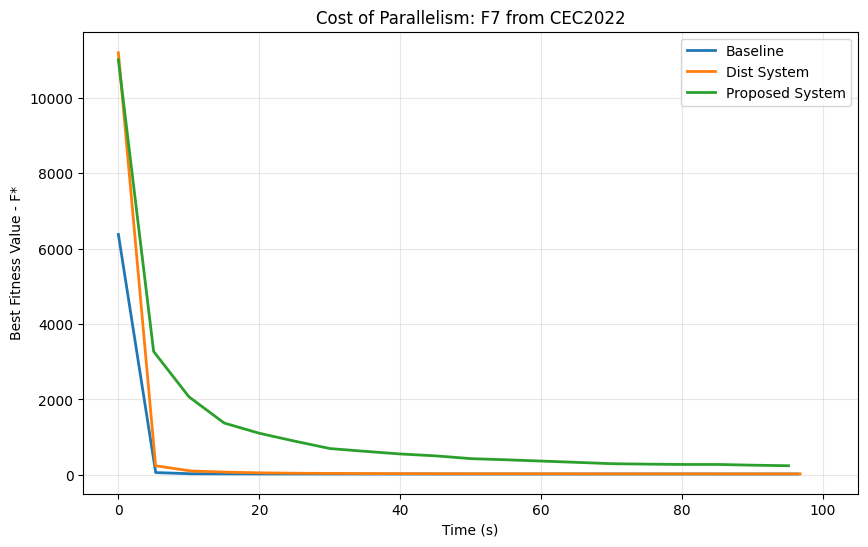

In [64]:
# Visualize averages together (truncated to 100 seconds)
import matplotlib.pyplot as plt
from opfunu.cec_based import cec2022

# Get the global optimum for the current problem
func_map = {
    'F7': cec2022.F72022(ndim=20),
    'F11': cec2022.F112022(ndim=20),
    'F12': cec2022.F122022(ndim=20),
}
cec_func = func_map[PROBLEM]
f_global = cec_func.f_global

max_time = 100

# Filter data to max_time and subtract global optimum
single_plot = single_avg[single_avg['time'] <= max_time].copy()
dist_plot = dist_avg[dist_avg['time'] <= max_time].copy()
proposed_plot = proposed_avg[proposed_avg['time'] <= max_time].copy()

single_plot['objective'] = single_plot['objective'] - f_global
dist_plot['objective'] = dist_plot['objective'] - f_global
proposed_plot['objective'] = proposed_plot['objective'] - f_global

plt.figure(figsize=(10, 6))
plt.plot(single_plot['time'], single_plot['objective'], label='Baseline', linewidth=2)
plt.plot(dist_plot['time'], dist_plot['objective'], label='Dist System', linewidth=2)
plt.plot(proposed_plot['time'], proposed_plot['objective'], label='Proposed System', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Best Fitness Value - F*')
plt.title(f'Cost of Parallelism: {PROBLEM} from CEC2022')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-5, max_time+5)
plt.ylim(bottom=-500)
plt.savefig(f'{PROBLEM}_plot_avg.png')
plt.show()

In [65]:
single_plot.to_csv(path_or_buf=f'{PROBLEM}_single.dat', sep=' ')
dist_plot.to_csv(path_or_buf=f'{PROBLEM}_dist.dat', sep=' ')
proposed_plot.to_csv(path_or_buf=f'{PROBLEM}_proposed.dat', sep=' ')
